In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap
import matplotlib as mpl

In [15]:
def get_data(sector_dict, start_date, end_date):
    data = {}
    for sector, name in sector_dict.items():
        ticker = yf.Ticker(sector)
        hist = ticker.history(start=start_date, end=end_date)
        weekly_return = (hist['Close'].iloc[-1] - hist['Open'].iloc[0]) / hist['Open'].iloc[0]
        data[name] = weekly_return
    return data

def get_sp500_data(start_date, end_date):
    ticker = yf.Ticker('^GSPC')  # S&P 500
    hist = ticker.history(start=start_date, end=end_date)
    weekly_return = (hist['Close'].iloc[-1] - hist['Open'].iloc[0]) / hist['Open'].iloc[0]
    return weekly_return

def prepare_data_frame(data):
    df = pd.DataFrame.from_dict(data, orient='index', columns=['Return'])
    df.index.name = 'Sector'
    df = df.reset_index()
    df.sort_values(by='Return', inplace=True)
    df.reset_index(drop=True, inplace=True)  
    return df

def plot_data(df, start_date, end_date):
    max_abs_return = max(abs(df['Return'].min()), df['Return'].max())
    colors = ["red", "white", "green"]
    cmap = LinearSegmentedColormap.from_list("", colors)
    norm = TwoSlopeNorm(vcenter=0, vmin=-max_abs_return, vmax=max_abs_return)
    bar_colors = cmap(norm(df['Return'].values))

    with plt.style.context('dark_background'):
        fig, ax = plt.subplots(figsize=(10, 6))
        bars = ax.barh(df['Sector'], df['Return'], color=bar_colors)
        ax.axis('off')  # Turn off the axis

        padding = max_abs_return * 0.05  # dynamic padding

        for i, v in enumerate(df['Return']):
            if v < 0:
                ax.text(v - padding, i, '-{:,.2%}'.format(abs(v)), color='grey', va='center', ha='right', fontsize=12)
                ax.text(padding, i, df.loc[i, 'Sector'], color='thistle', va='center', ha='left', fontsize=14)  
            else:
                ax.text(v + padding, i, '{:,.2%}'.format(v), color='grey', va='center', ha='left', fontsize=12)
                ax.text(-padding, i, df.loc[i, 'Sector'], color='thistle', va='center', ha='right', fontsize=14)  

        plt.title(f'S&P 500 Sector Returns for the Week of {start_date} to {end_date}', color='lightsteelblue', fontsize=16)
        plt.tight_layout()
        plt.show()

In [16]:
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

sector_dict = {
    'XLC': 'Communication Services',
    'XLY': 'Consumer Discretionary',
    'XLP': 'Consumer Staples',
    'XLE': 'Energy',
    'XLF': 'Financials',
    'XLI': 'Industrials',
    'XLB': 'Materials',
    'XLV': 'Health Care',
    'XLRE': 'Real Estate',
    'XLK': 'Technology',
    'XLU': 'Utilities'
}

In [17]:
data = get_data(sector_dict, start_date, end_date)
data['S&P 500'] = get_sp500_data(start_date, end_date)

df = prepare_data_frame(data)

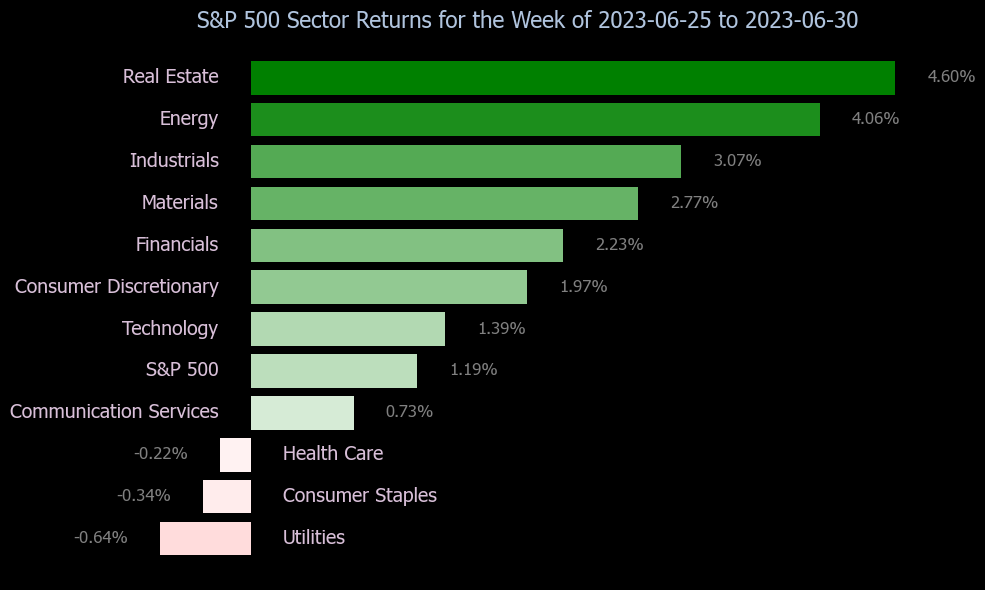

In [18]:
start_date = '2023-06-25'
end_date = '2023-06-30'

plot_data(df, start_date, end_date)

In [6]:
data

{'Communication Services': 0.007348361904795986,
 'Consumer Discretionary': 0.01970317554288217,
 'Consumer Staples': -0.0033884522111181105,
 'Energy': 0.04064518097908266,
 'Financials': 0.022330975004688145,
 'Industrials': 0.030705209840500278,
 'Materials': 0.027663025426922356,
 'Health Care': -0.002202424927208726,
 'Real Estate': 0.04602514912434339,
 'Technology': 0.01386253729612274,
 'Utilities': -0.006447623163657191,
 'S&P 500': 0.011876179447782437}